In [23]:
#Uploading files from your local file system
# from google.colab import files
# uploaded = files.upload()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
data = pd.read_csv("2425_QC.csv", index_col = 0)

%matplotlib inline

In [24]:
#Information about datasets
print("Number of rows and columns in the data:", data.shape)

print("Information about the data structure:")
data.info()

print("Names of the attributes in the dataset:", data.columns)

print("Some top rows of the data:")
data.head()

Number of rows and columns in the data: (1002, 9)
Information about the data structure:
<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 68.95 to 36.91
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1001 non-null   float64
 1   Area Income           1002 non-null   float64
 2   Daily Internet Usage  1002 non-null   float64
 3   Ad Topic Line         1002 non-null   object 
 4   City                  1002 non-null   object 
 5   Male                  1002 non-null   int64  
 6   Country               1002 non-null   object 
 7   Timestamp             1002 non-null   object 
 8   Clicked on Ad         1002 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 78.3+ KB
Names of the attributes in the dataset: Index(['Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City',
       'Male', 'Country', 'Timestamp', 'Clicked on Ad'],
      d

,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
Daily Time Spent on Site,,,,,,,,,
68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0


Data Preprocessing

* Handling Missing Value

In [25]:
#Handling Missing Value & Empty Data
print("Missing Values:")
missing_values = data.isnull().sum()
print(missing_values)

Missing Values:
Age                     1
Area Income             0
Daily Internet Usage    0
Ad Topic Line           0
City                    0
Male                    0
Country                 0
Timestamp               0
Clicked on Ad           0
dtype: int64


In [26]:
#Filling missing value by median value
data['Age'].fillna(data['Age'].median(), inplace = True)

#Check number of missing values
print("Missing Values:")
missing_values_after = data.isnull().sum()
print(missing_values_after)

Missing Values:
Age                     0
Area Income             0
Daily Internet Usage    0
Ad Topic Line           0
City                    0
Male                    0
Country                 0
Timestamp               0
Clicked on Ad           0
dtype: int64


C:\Users\nguye\AppData\Local\Temp\ipykernel_12960\3297258053.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace = True)


* Handling Outliers | Non Relevents Data

<function matplotlib.pyplot.show(close=None, block=None)>

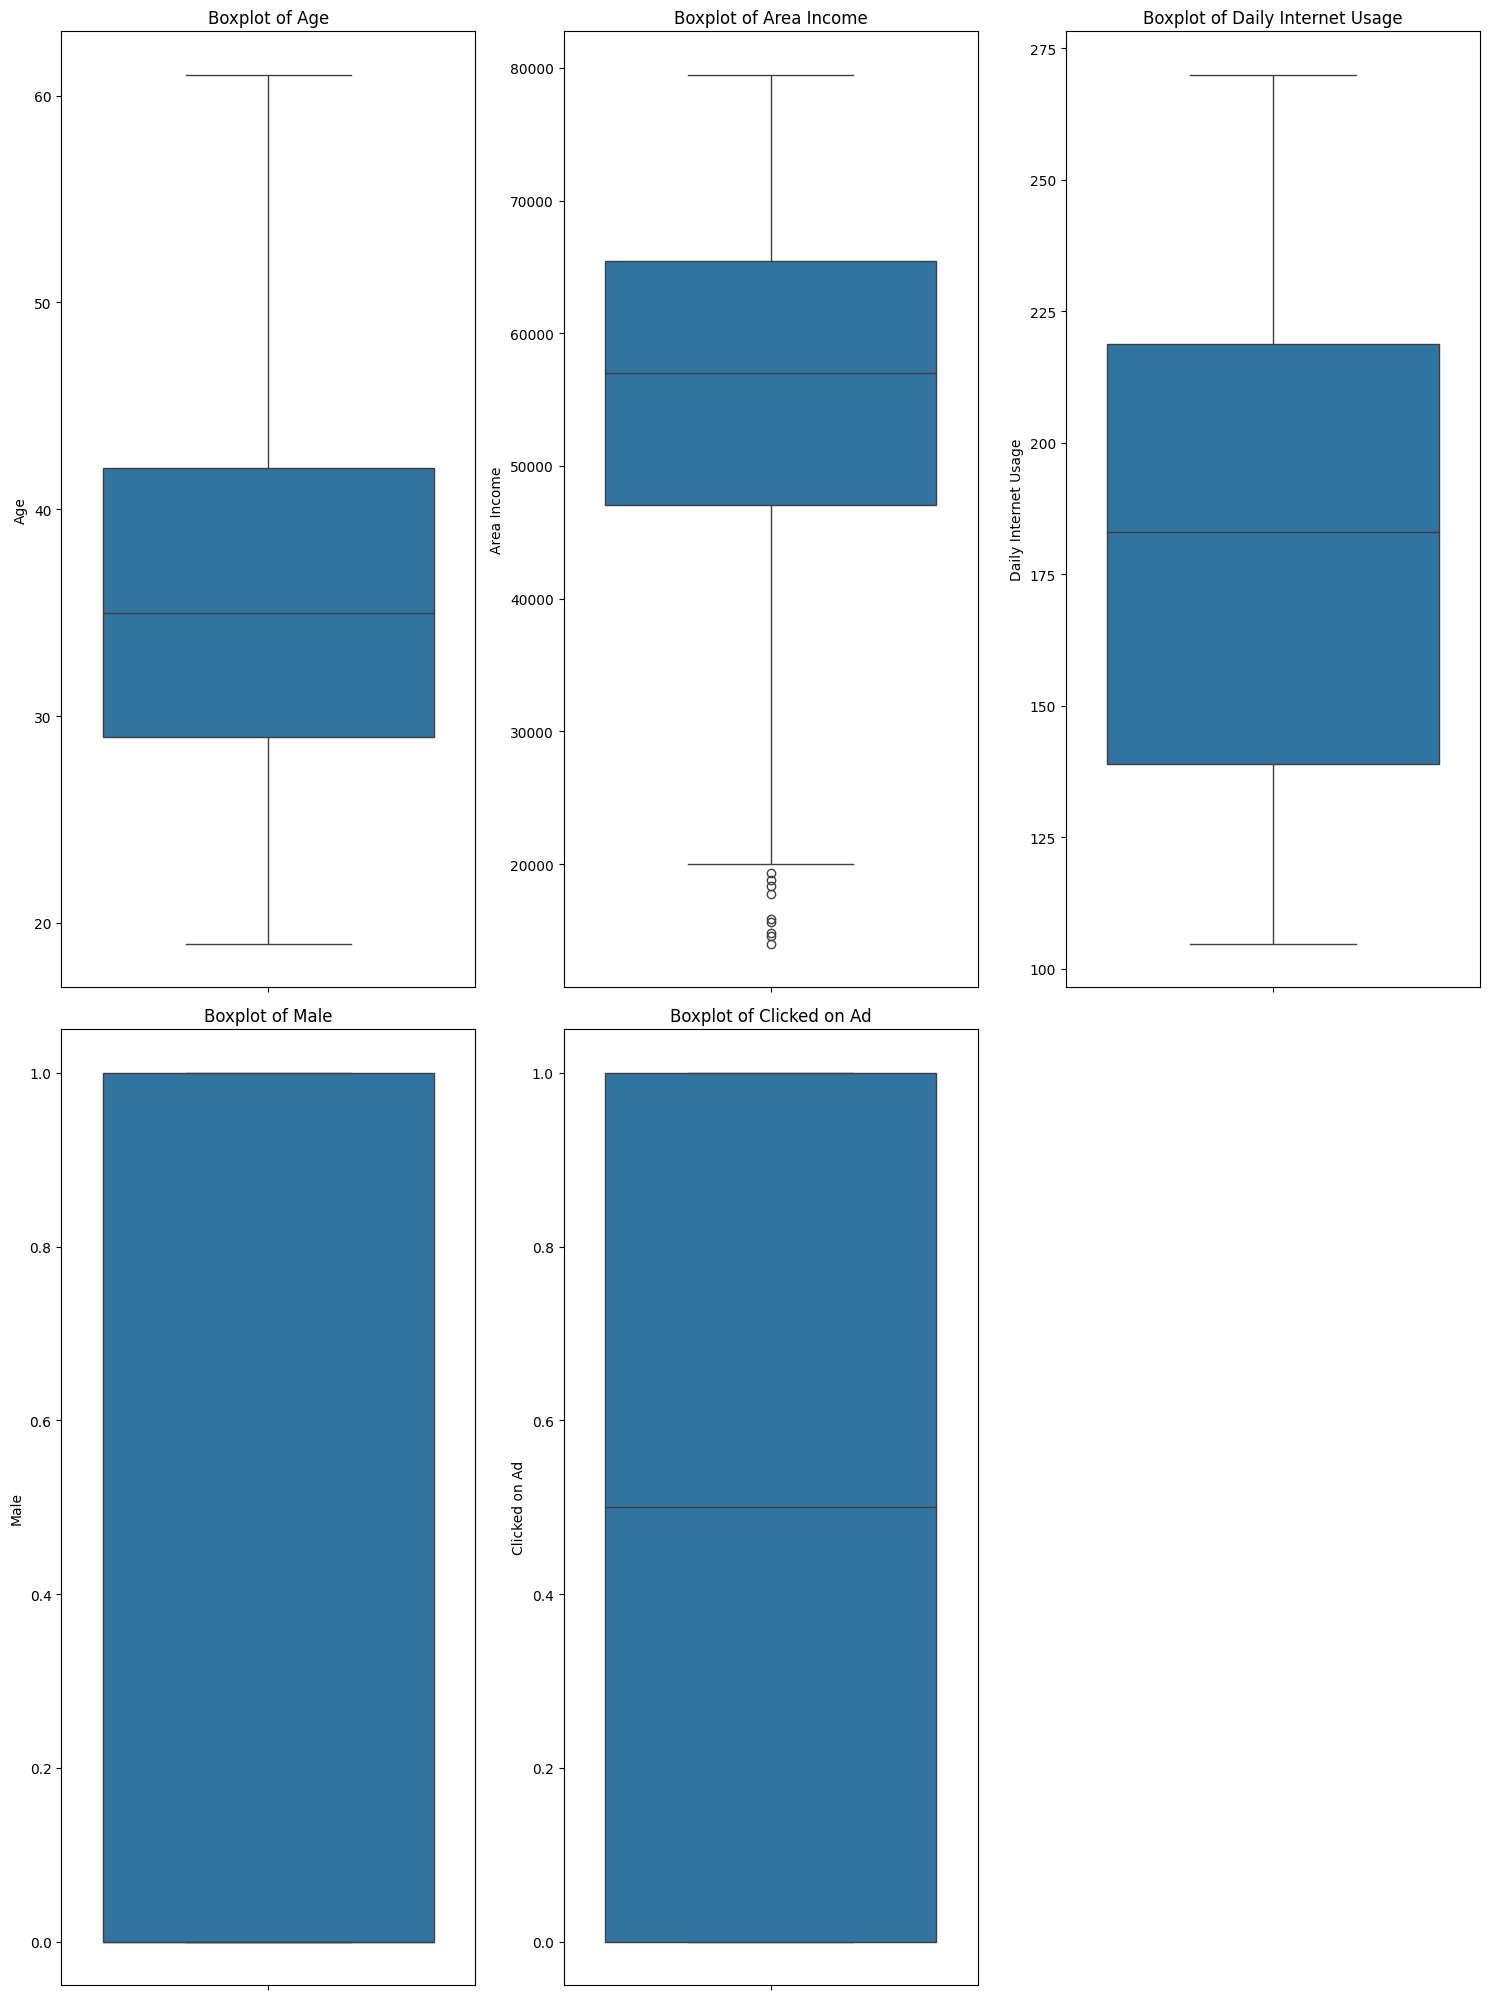

In [27]:
# Handling Outliers & Non Relevents Data
# Using matplotlib
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Create Box Plot
plt.figure(figsize=(15, 10*((len(numeric_columns)-1) + 1)))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) - 1) + 1, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show

In [28]:
#Function for print value outliers of each method
def print_outliers_detail(data, outliers_dict, method_name):
    print(f"\n{'='*50}")
    print(f"{method_name} Method Outliers Detail:")
    print(f"{'='*50}")
    
    for column in outliers_dict:
        print(f"\nColumn: {column}")
        print(f"Number of outliers: {len(outliers_dict[column])}")
        print("-"*30)
        print("Outlier values:")
        
        # Get the outlier values
        outlier_values = data.loc[outliers_dict[column], column]
        
        # Create a DataFrame with index and values
        outliers_data = pd.DataFrame({
            'Index': outlier_values.index,
            'Value': outlier_values.values
        })
        
        # Sort by value to see most extreme outliers first
        outliers_data = outliers_data.sort_values('Value', ascending=False)
        
        # Print with some formatting
        print(outliers_data.to_string())
        
        
# Function for detect outliers using Z-score and IQR
def detect_outliers_zscore(data, columns, threshold=3):
    """Detect outliers using Z-score method"""
    outliers_dict = {}
    for column in columns:
        z_scores = stats.zscore(data[column])
        outliers_dict[column] = data[abs(z_scores) > threshold].index
    return outliers_dict

def detect_outliers_iqr(data, columns):
    """Detect outliers using IQR method"""
    outliers_dict = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_dict[column] = data[(data[column] < lower_bound) | 
                                 (data[column] > upper_bound)].index
    return outliers_dict

In [29]:
# Call function detect outliers
# Using Z-score
zscore_outliers = detect_outliers_zscore(data, numeric_columns)
print("Outliers detected by Z-score method:")
for col in zscore_outliers:
    print(f"{col}: {len(zscore_outliers[col])} outliers")

# Using IQR method
iqr_outliers = detect_outliers_iqr(data, numeric_columns)
print("\nOutliers detected by IQR method:")
for col in iqr_outliers:
    print(f"{col}: {len(iqr_outliers[col])} outliers")
    
print_outliers_detail(data, zscore_outliers, "Z-Score")
print_outliers_detail(data, iqr_outliers, "IQR")

Outliers detected by Z-score method:
Age: 0 outliers
Area Income: 3 outliers
Daily Internet Usage: 0 outliers
Male: 0 outliers
Clicked on Ad: 0 outliers

Outliers detected by IQR method:
Age: 0 outliers
Area Income: 9 outliers
Daily Internet Usage: 0 outliers
Male: 0 outliers
Clicked on Ad: 0 outliers

Z-Score Method Outliers Detail:

Column: Age
Number of outliers: 0
------------------------------
Outlier values:
Empty DataFrame
Columns: [Index, Value]
Index: []

Column: Area Income
Number of outliers: 3
------------------------------
Outlier values:
   Index     Value
2  52.67  14775.50
0  66.26  14548.06
1  68.58  13996.50

Column: Daily Internet Usage
Number of outliers: 0
------------------------------
Outlier values:
Empty DataFrame
Columns: [Index, Value]
Index: []

Column: Male
Number of outliers: 0
------------------------------
Outlier values:
Empty DataFrame
Columns: [Index, Value]
Index: []

Column: Clicked on Ad
Number of outliers: 0
------------------------------
Outlier 

In [30]:
# Handling Outliers
def handle_outliers(data, outliers_dict, method='remove'):
    """Handle outliers by either removing or capping them"""
    data_cleaned = data.copy()
    
    if method == 'remove':
        # Get unique indices of all outliers
        all_outliers = set()
        for col_outliers in outliers_dict.values():
            all_outliers.update(col_outliers)
        data_cleaned = data_cleaned.drop(index=list(all_outliers))
        
    elif method == 'cap':
        for column in outliers_dict:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            data_cleaned[column] = data_cleaned[column].clip(lower=lower_bound, upper=upper_bound)
    
    return data_cleaned

# Create two versions of each method about cleaned data
data_removed_zscore = handle_outliers(data, zscore_outliers, method='remove')
data_capped_zscore = handle_outliers(data, zscore_outliers, method='cap')

data_removed_iqr = handle_outliers(data, iqr_outliers, method='remove')
data_capped_iqr = handle_outliers(data, iqr_outliers, method='cap')

print("Original shape:", data.shape)
print("Shape if using Z-score method after removing outliers:", data_removed_zscore.shape)
print("Shape if using Z-score method after capping outliers:", data_capped_zscore.shape)

print("Shape if using IQR method after removing outliers:", data_removed_iqr.shape)
print("Shape if using IQR method after capping outliers:", data_capped_iqr.shape)


Original shape: (1002, 9)
Shape if using Z-score method after removing outliers: (999, 9)
Shape if using Z-score method after capping outliers: (1002, 9)
Shape if using IQR method after removing outliers: (993, 9)
Shape if using IQR method after capping outliers: (1002, 9)


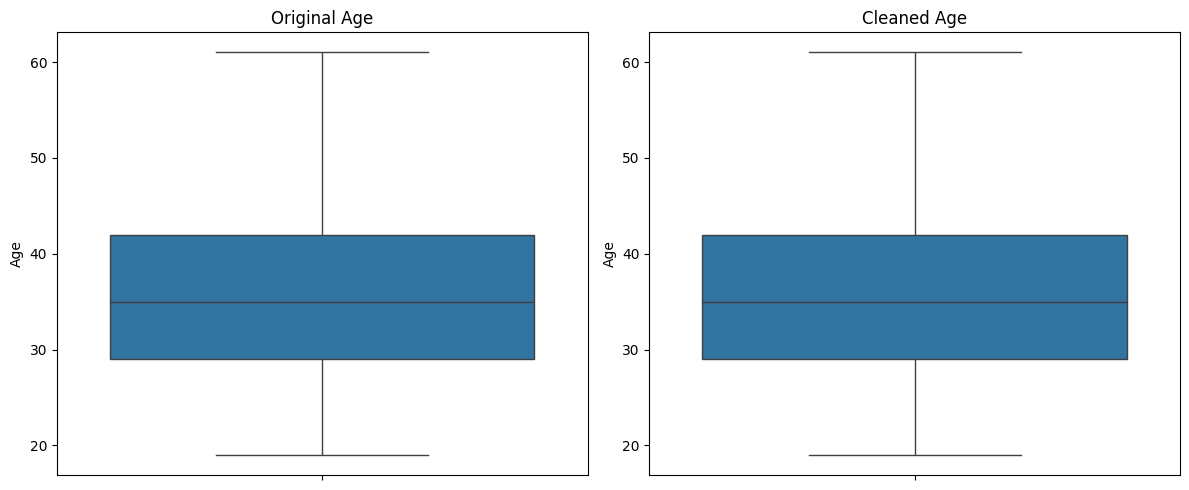

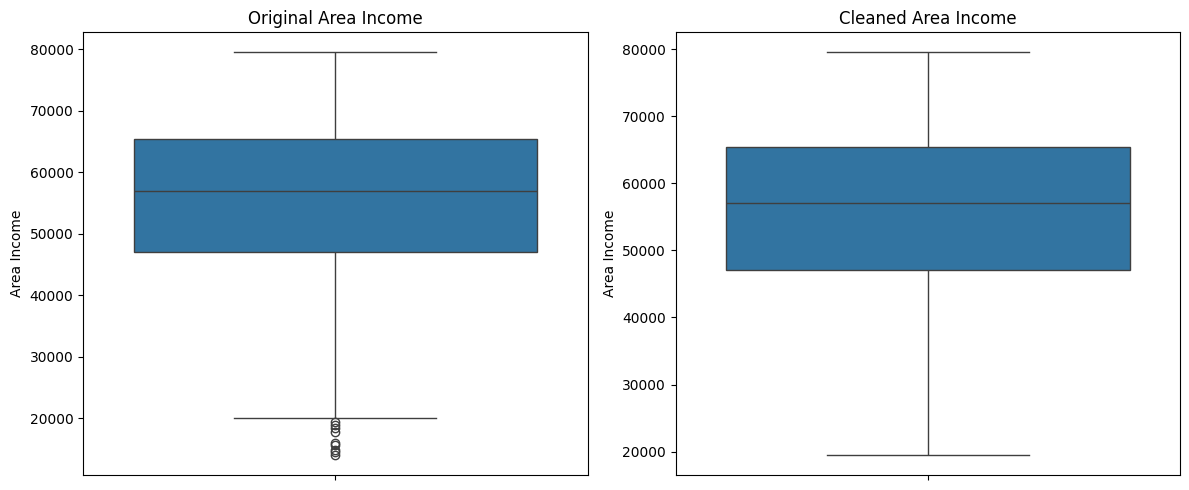

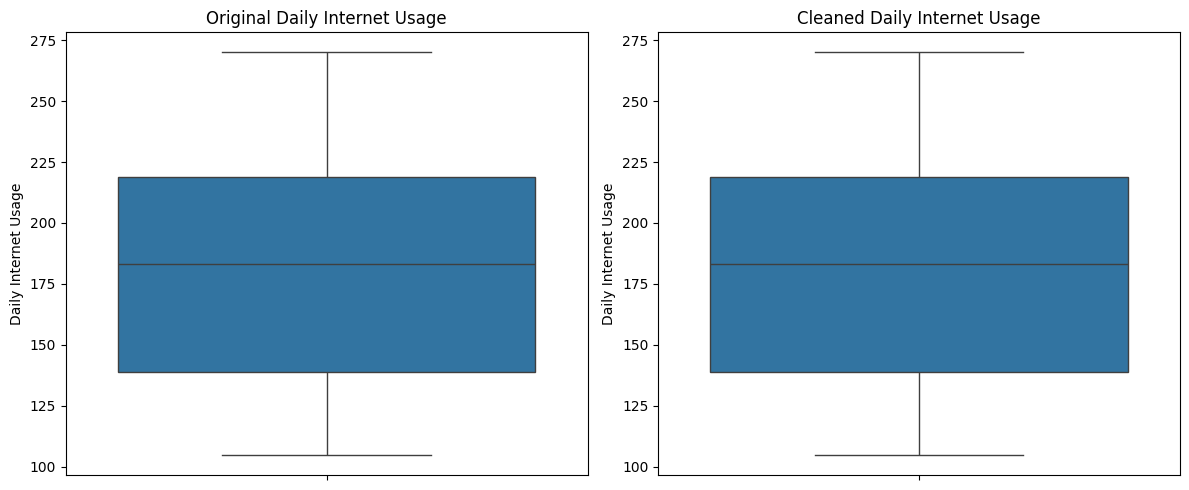

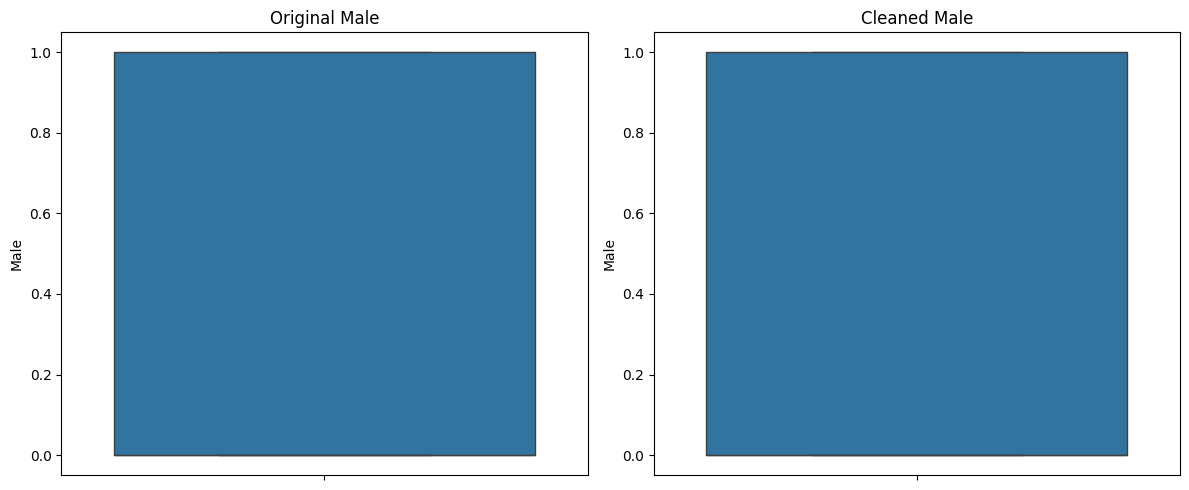

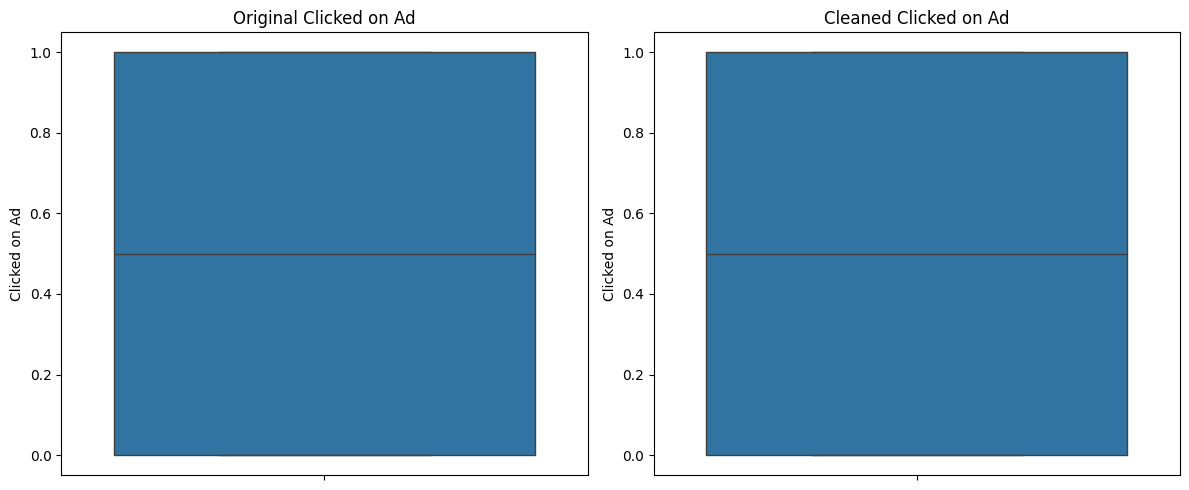

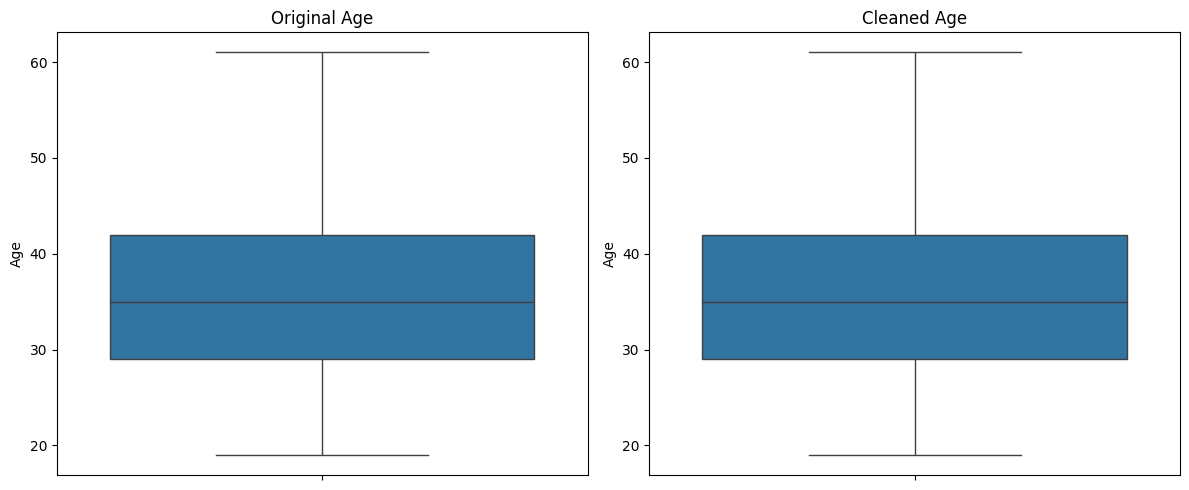

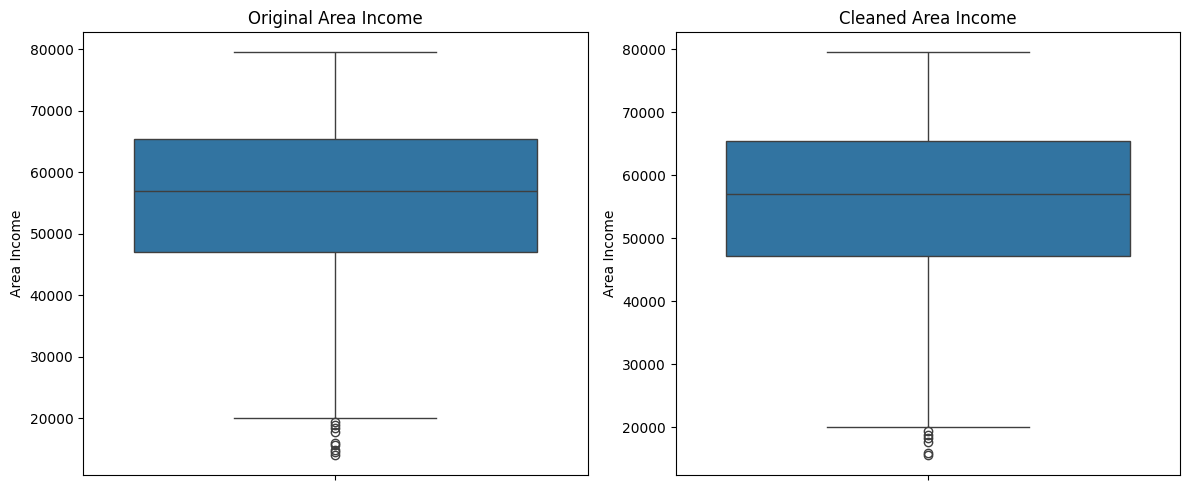

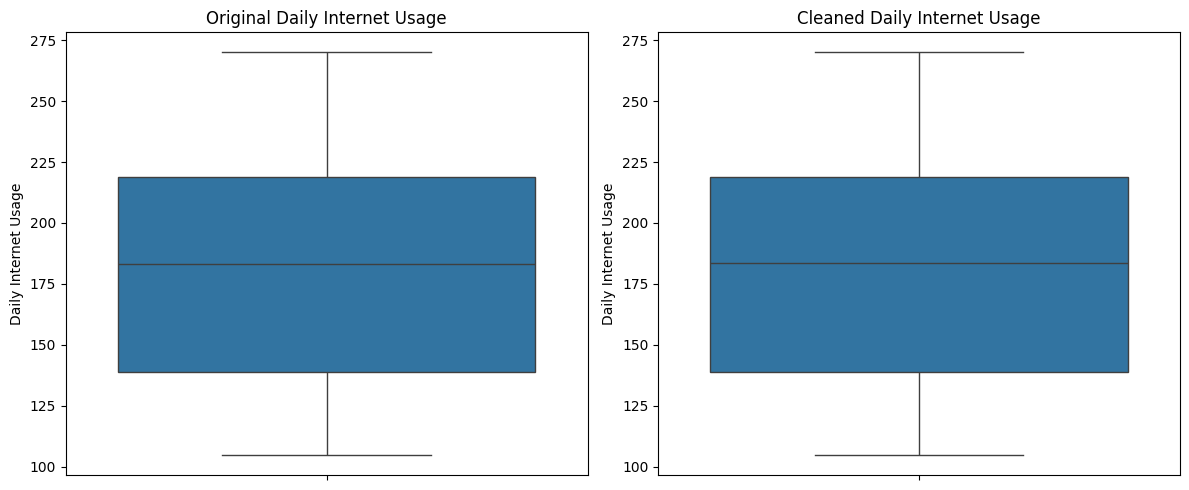

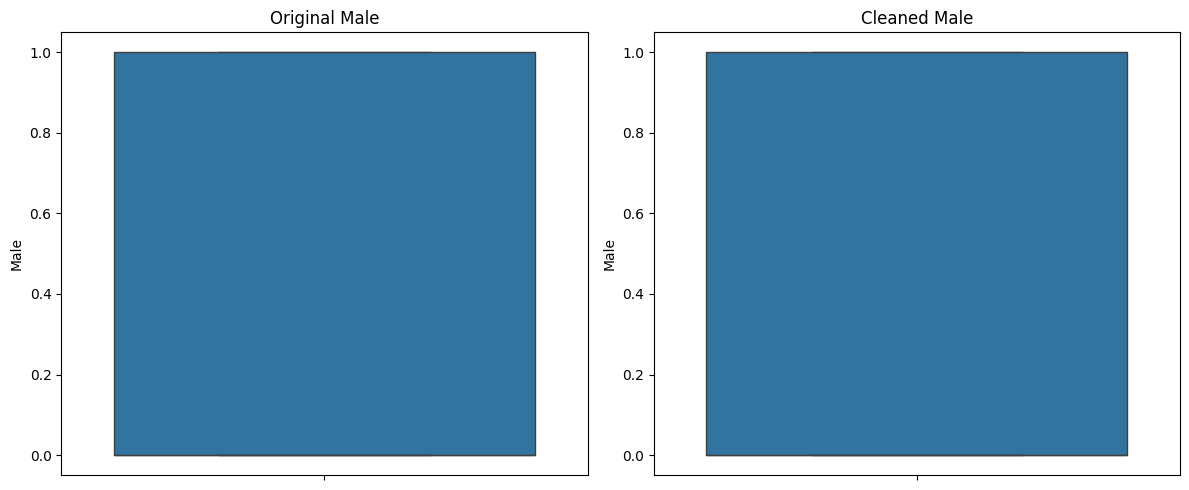

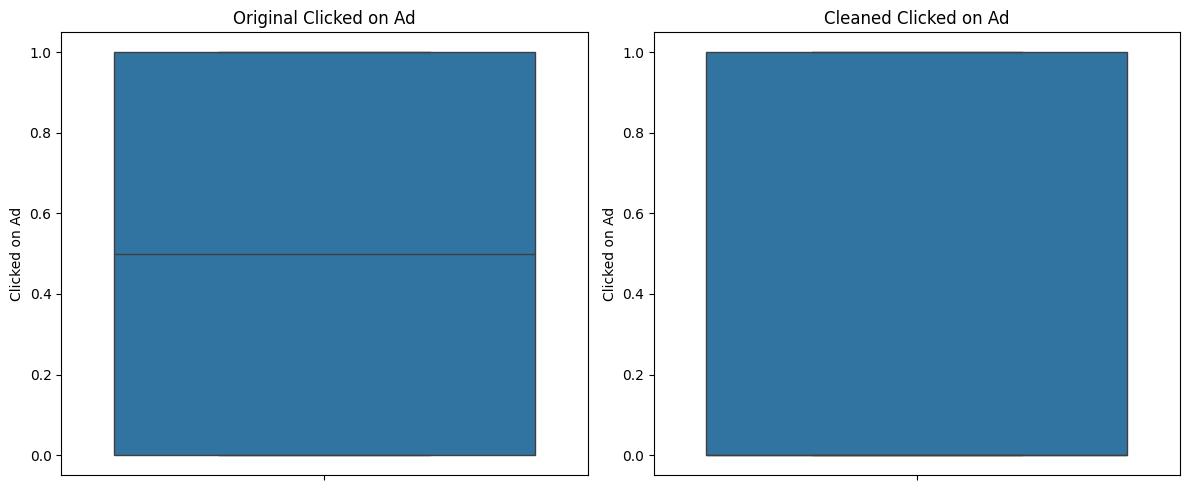

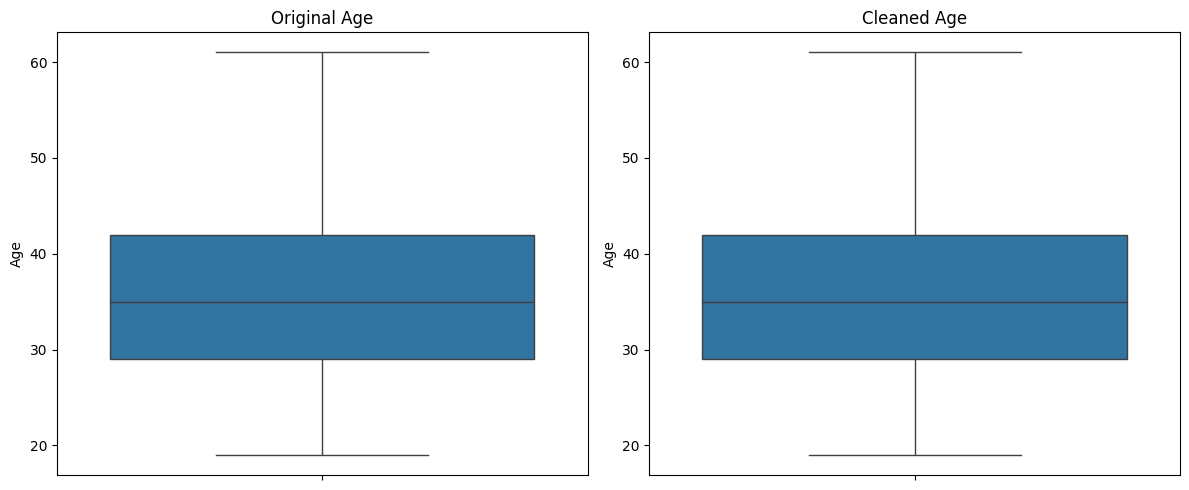

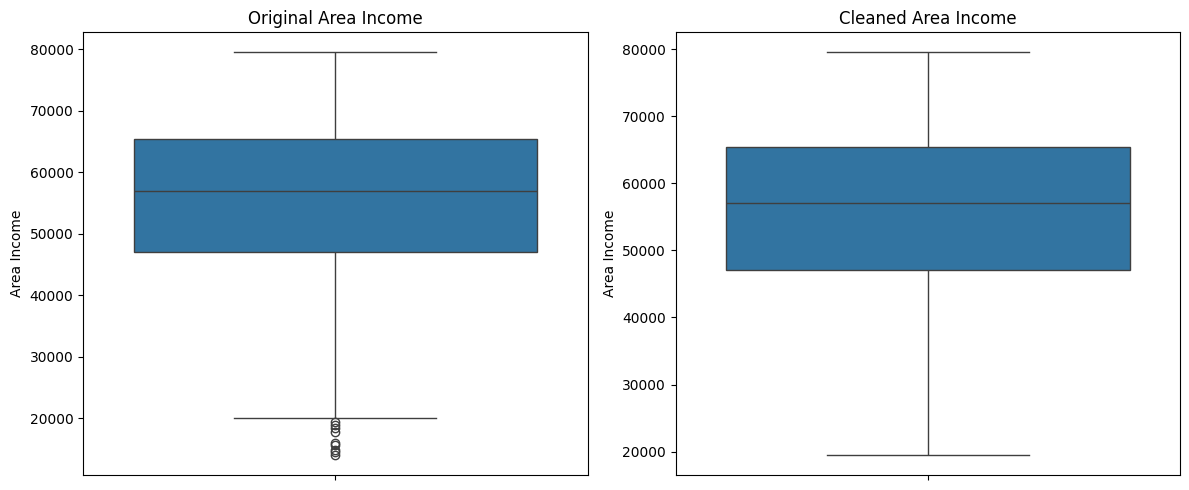

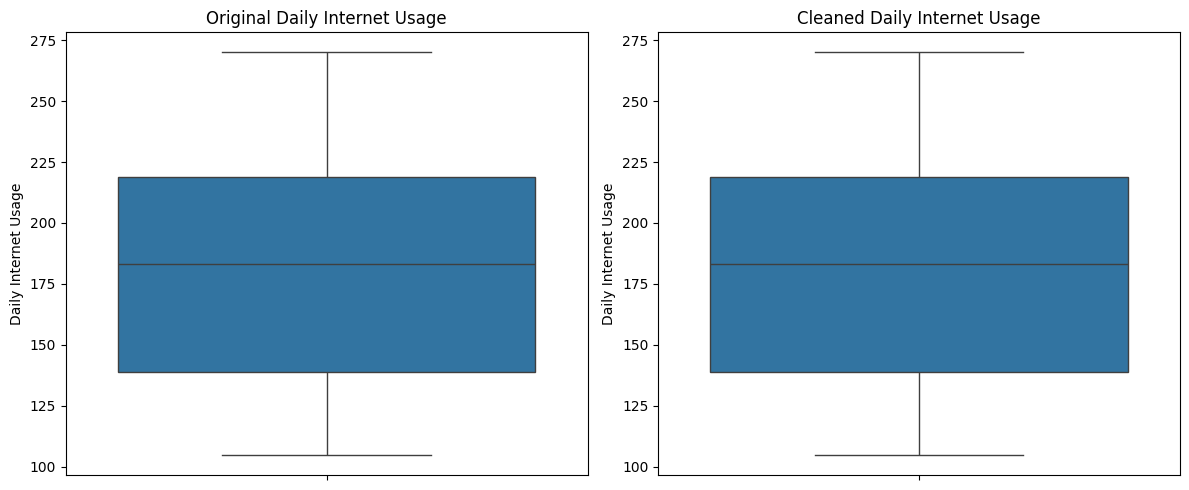

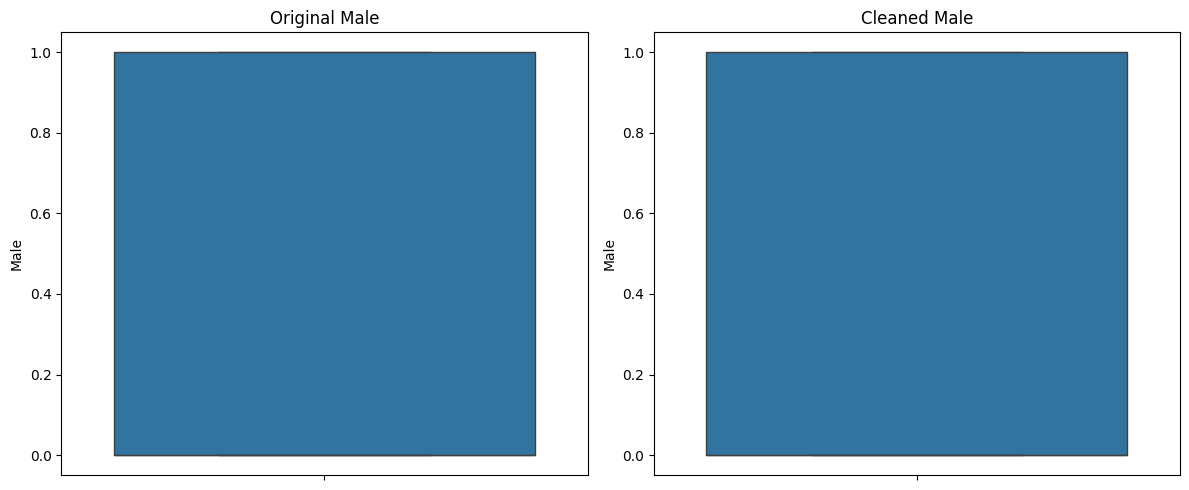

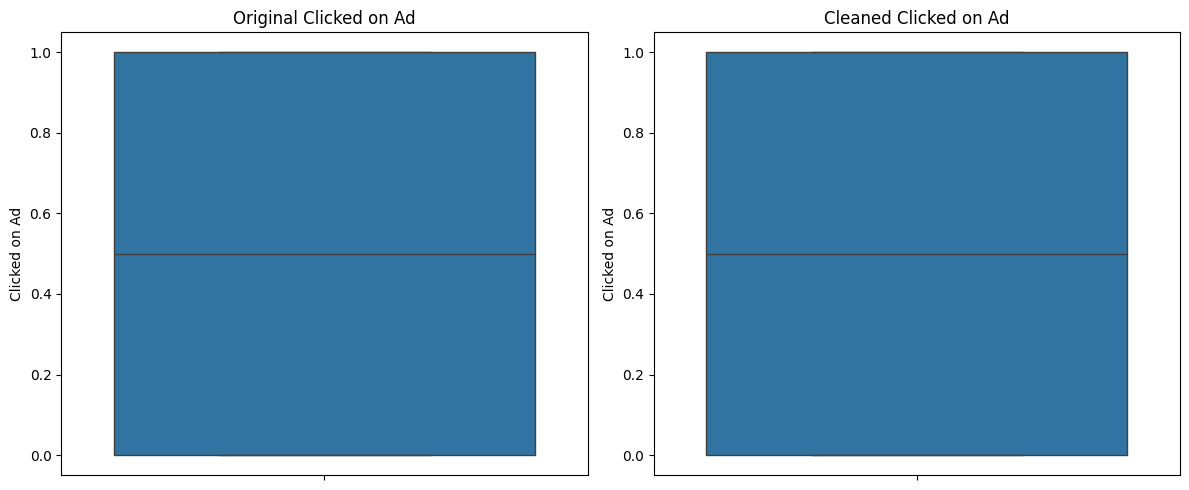

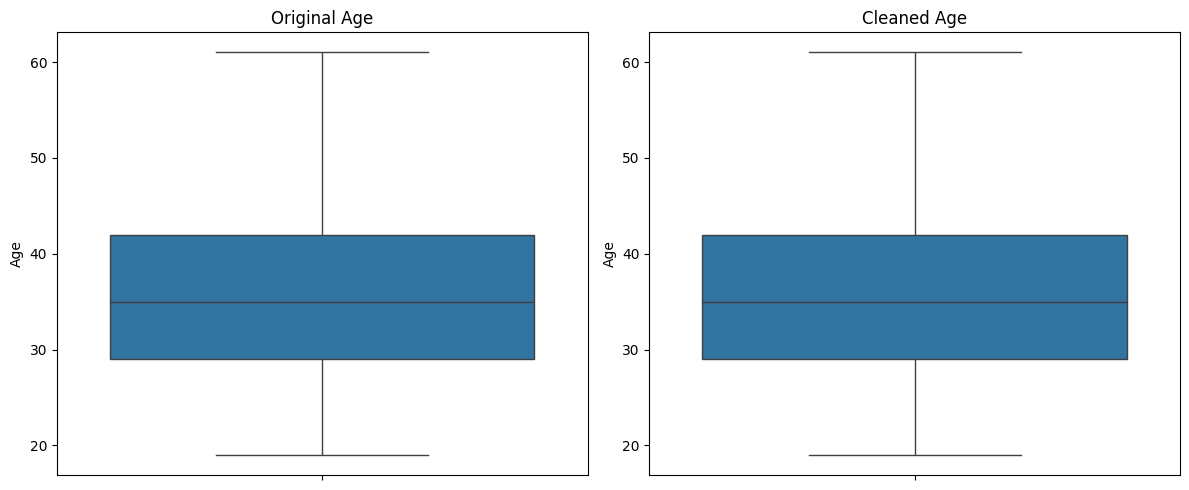

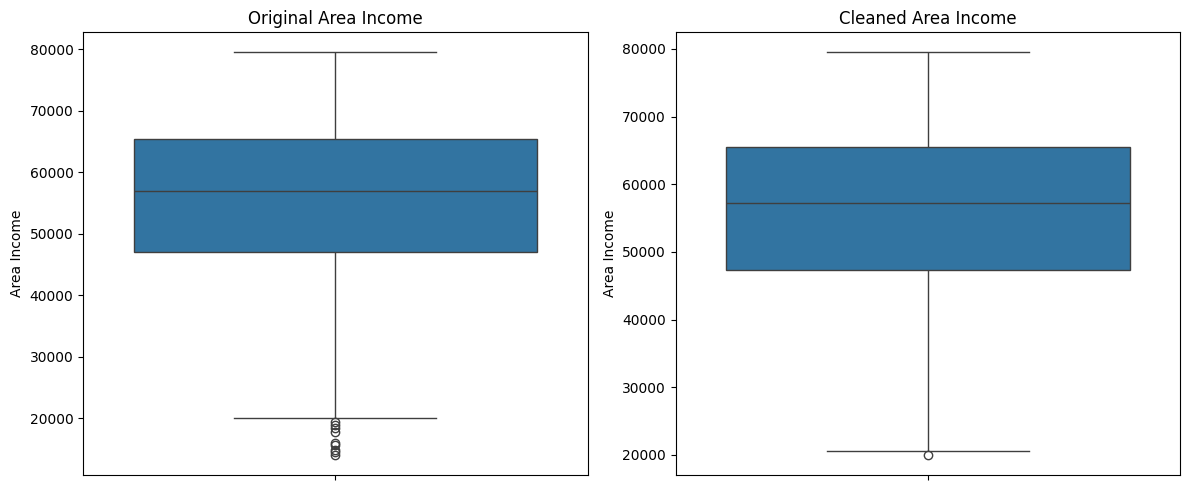

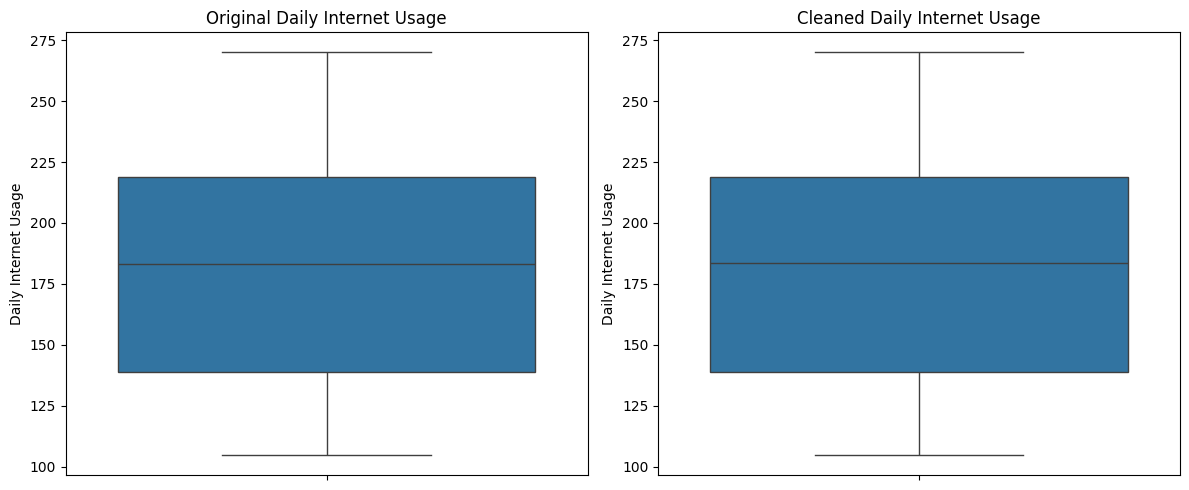

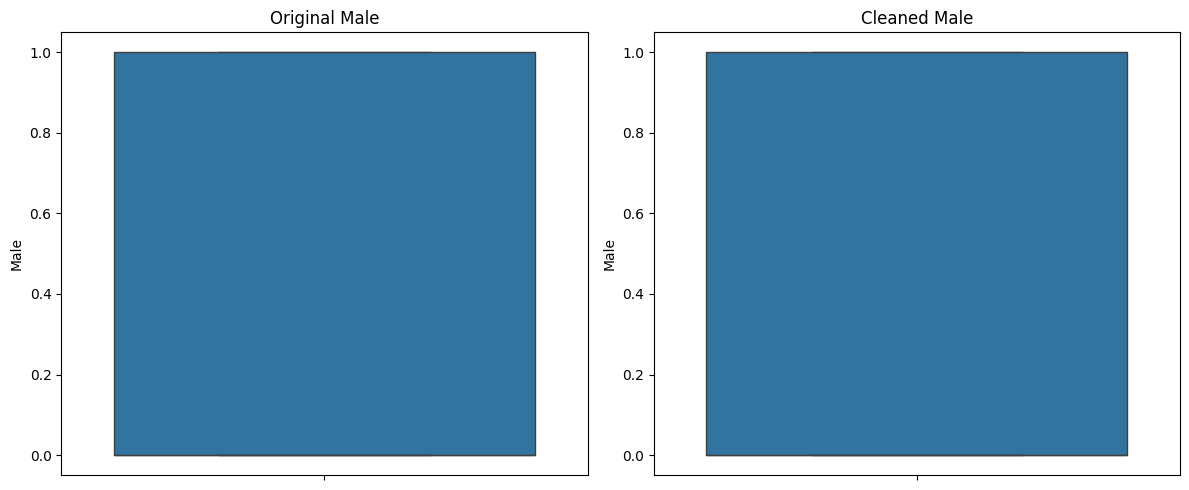

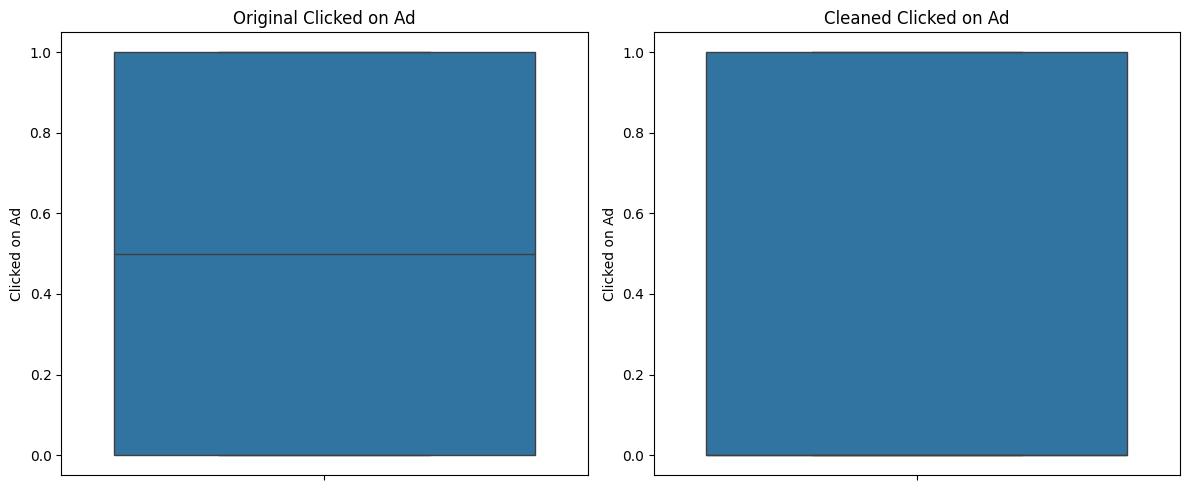

In [10]:
# Visualize the results
def plot_comparison(original_df, cleaned_df, column):
    """Compare distributions before and after cleaning"""
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(y=original_df[column])
    plt.title(f'Original {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=cleaned_df[column])
    plt.title(f'Cleaned {column}')
    
    plt.tight_layout()
    plt.show()

# Compare distributions for each numeric column
for column in numeric_columns:
    plot_comparison(data, data_capped_zscore, column)
    
for column in numeric_columns:
    plot_comparison(data, data_removed_zscore, column)
    
for column in numeric_columns:
    plot_comparison(data, data_capped_iqr, column)
    
for column in numeric_columns:
    plot_comparison(data, data_removed_iqr, column)

In [31]:
# Choosing capped version of IQR method
cleaned_data = data_capped_iqr  
cleaned_data.to_csv('cleaned_2425_QC_1.csv')
print("Cleaned data saved to 'cleaned_2425_QC_1.csv'")

Cleaned data saved to 'cleaned_2425_QC_1.csv'


* Incorrect Types

In [33]:
print(cleaned_data.dtypes)

# Identify columns with potential type mismatches
def detect_type_issues(df):
    type_issues = {}
    for column in df.columns:
        try:
            # Try to infer and convert
            test_conversion = pd.to_numeric(df[column], errors='raise')
        except (ValueError, TypeError):
            type_issues[column] = df[column].dtype
    return type_issues



Age                     float64
Area Income             float64
Daily Internet Usage    float64
Ad Topic Line            object
City                     object
Male                      int64
Country                  object
Timestamp                object
Clicked on Ad             int64
dtype: object


In [35]:
print("Some top rows of the cleaned data before format Timestamp column:")
cleaned_data.head(10)

Some top rows of the cleaned data before format Timestamp column:


,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
Daily Time Spent on Site,,,,,,,,,
68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0
59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,19/5/2016 14:30,0
88.91,33.0,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,28/1/2016 20:59,0
66.00,48.0,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,7/3/2016 1:40,1
74.53,30.0,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,18/4/2016 9:33,0


- Format type of Timestamp column to "dd/mm/yyyy hh:mm"

In [36]:
def convert_to_custom_format(date_series):
    """
    Convert date series to dd/mm/yyyy hh:mm format
    
    Handles multiple input formats:
    - Various datetime strings
    - Timestamp objects
    - Different date representations
    """
    try:
        # Convert to datetime first, handling various input formats
        converted_dates = pd.to_datetime(
            date_series, 
            errors='coerce',  # Convert invalid dates to NaT
            dayfirst=True,  # Prioritize day-first formats
            yearfirst=False
        )
        
        # Format to desired output
        return converted_dates.dt.strftime('%d/%m/%Y %H:%M')
    
    except Exception as e:
        print(f"Conversion error: {e}")
        return date_series

# Apply the conversion
cleaned_data['Timestamp'] = convert_to_custom_format(cleaned_data['Timestamp'])

In [37]:

print("Some top rows of the cleaned data after format Timestamp column:")
cleaned_data.head(10)

Some top rows of the cleaned data after format Timestamp column:


,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
Daily Time Spent on Site,,,,,,,,,
68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 00:53,0
80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 01:39,0
69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 02:31,0
68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 03:36,0
59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,19/05/2016 14:30,0
88.91,33.0,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,28/01/2016 20:59,0
66.00,48.0,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,07/03/2016 01:40,1
74.53,30.0,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,18/04/2016 09:33,0


II. EDA


1. Phân tích đơn biến (Univariate Analysis)

Phân tích các biến số (age, income, gender, daily internet usage, etc.).

Basic Statistics:
               Age   Area Income  Daily Internet Usage         Male  \
count  1002.000000   1002.000000           1002.000000  1002.000000   
mean     36.023952  55028.288850            180.031637     0.481038   
std       8.781362  13326.918589             43.893820     0.499890   
min      19.000000  19504.987500            104.780000     0.000000   
25%      29.000000  47073.067500            138.905000     0.000000   
50%      35.000000  57012.300000            183.130000     0.000000   
75%      42.000000  65451.787500            218.797500     1.000000   
max      61.000000  79484.800000            269.960000     1.000000   

       Clicked on Ad  
count     1002.00000  
mean         0.50000  
std          0.50025  
min          0.00000  
25%          0.00000  
50%          0.50000  
75%          1.00000  
max          1.00000  


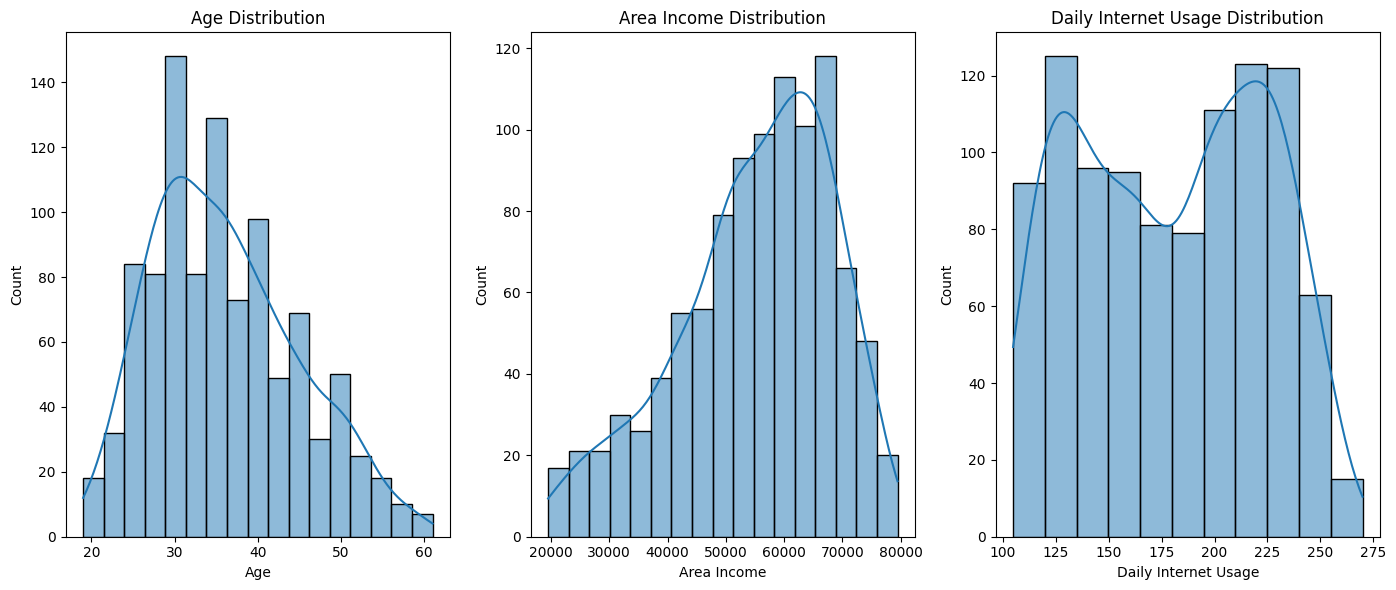

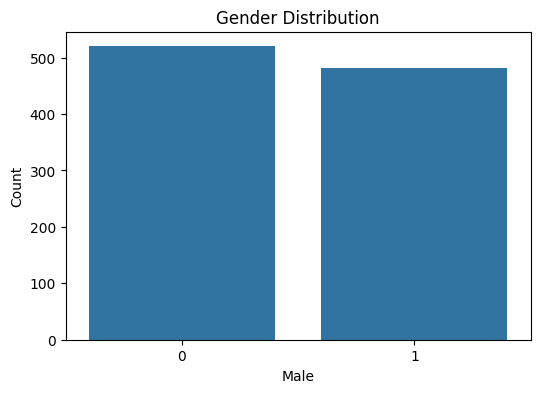

In [38]:
# Calculate basic statistics
statistics = cleaned_data.describe()

# Print basic statistics
print("Basic Statistics:")
print(statistics)

# Plot histograms for continuous variables
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(cleaned_data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(cleaned_data['Area Income'], kde=True)
plt.title('Area Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(cleaned_data['Daily Internet Usage'], kde=True)
plt.title('Daily Internet Usage Distribution')

plt.tight_layout()
plt.show()

# Plot bar plot for categorical variable (Gender)
plt.figure(figsize=(6, 4))
sns.countplot(x='Male', data=cleaned_data)
plt.title('Gender Distribution')
plt.xlabel('Male')
plt.ylabel('Count')
plt.show()


Phân tích chủ đề quảng cáo. Xác định các chủ đề quảng cáo phổ biến.


In [39]:
from wordcloud import WordCloud

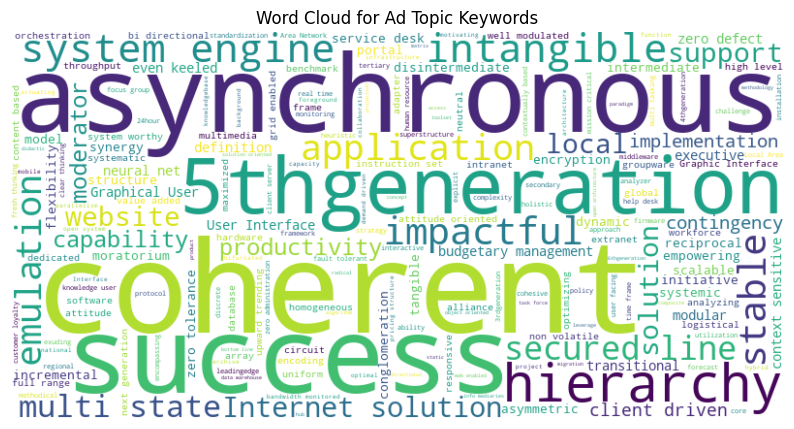

In [41]:
# Extract keywords from Ad Topic Line
cleaned_data['Ad Topic Keywords'] = cleaned_data['Ad Topic Line'].apply(lambda x: ' '.join(x.split()[1:]))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_data['Ad Topic Keywords']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ad Topic Keywords')
plt.show()

2. Phân tích đa biến

Phân tích mối quan hệ giữa thời gian sử dụng Internet và khả năng click quảng cáo (Daily Internet Usage vs Clicked on Ad)


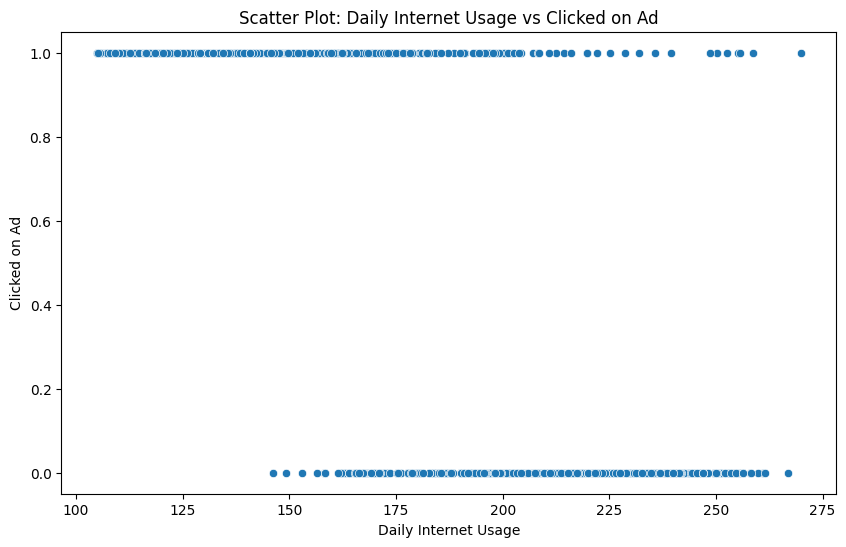

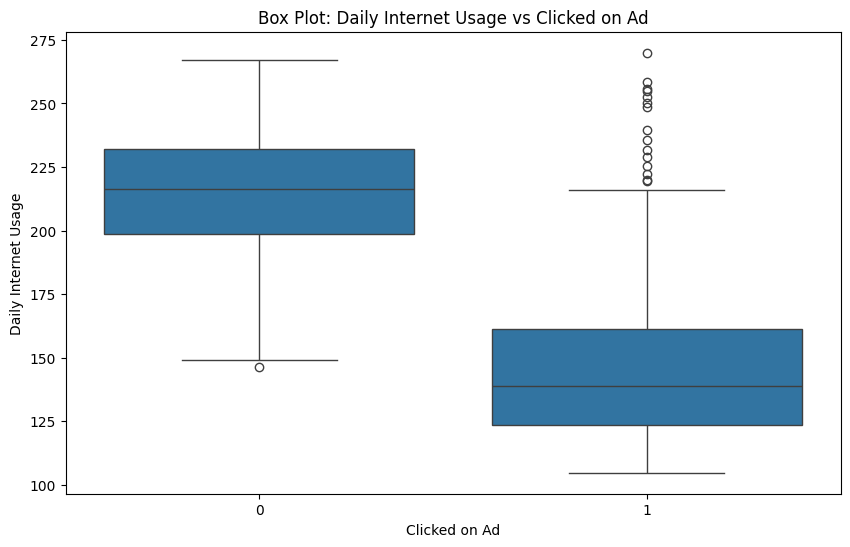

In [44]:
# Plot scatter plot for Daily Internet Usage vs Clicked on Ad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Internet Usage', y='Clicked on Ad', data=cleaned_data)
plt.title('Scatter Plot: Daily Internet Usage vs Clicked on Ad')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Clicked on Ad')
plt.show()

# Plot box plot for Daily Internet Usage vs Clicked on Ad
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=cleaned_data)
plt.title('Box Plot: Daily Internet Usage vs Clicked on Ad')
plt.xlabel('Clicked on Ad')
plt.ylabel('Daily Internet Usage')
plt.show()